

The datasets consist of several  independent variables  include:

* Car_Name
* Year
* Selling_Price
* Present_Price
* Kms_Driven
* Fuel_Type
* Seller_Type
* Transmission
* Owner


<a id="2"></a> 
**Loading Data and Explanation of Features**

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#seaborn
import seaborn as sns
# matplotlib
import matplotlib.pyplot as plt
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import os

In [5]:
data=pd.read_csv("./car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
data.isna().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [8]:
print(data.Fuel_Type.value_counts(),"\n")
print(data.Seller_Type.value_counts(),"\n")
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 

Manual       261
Automatic     40
Name: Transmission, dtype: int64


changing these object values to numerical values to make it proper for regression models.

In [9]:
#Fuel_Type ==> 1 = Petrol , 0 = Diesel , 2 = CNG
#Seller_Type ==> 1 = Manual , 0 = Automatic 
#Seller_Type ==> 1 = Dealer , 0 = Individual

data.Fuel_Type.replace(regex={"Petrol":"0","Diesel":"1","CNG":"2"},inplace=True)
data.Seller_Type.replace(regex={"Dealer":"0","Individual":"1"},inplace=True)
data.Transmission.replace(regex={"Manual":"0","Automatic":"1"},inplace=True)
data[["Fuel_Type","Seller_Type","Transmission"]]=data[["Fuel_Type","Seller_Type","Transmission"]].astype(int)

In [16]:
data['no_year']= 2021 - data['Year'] 

In [17]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,ritz,2014,3.35,5.59,27000,0,0,0,0,7
1,sx4,2013,4.75,9.54,43000,1,0,0,0,8
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,4
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,10
4,swift,2014,4.60,6.87,42450,1,0,0,0,7


<a id="3"></a> 
**Exploratory Data Analysis (EDA)**

Before applying regression models, lets look at the features and also relationship with each other by visually.

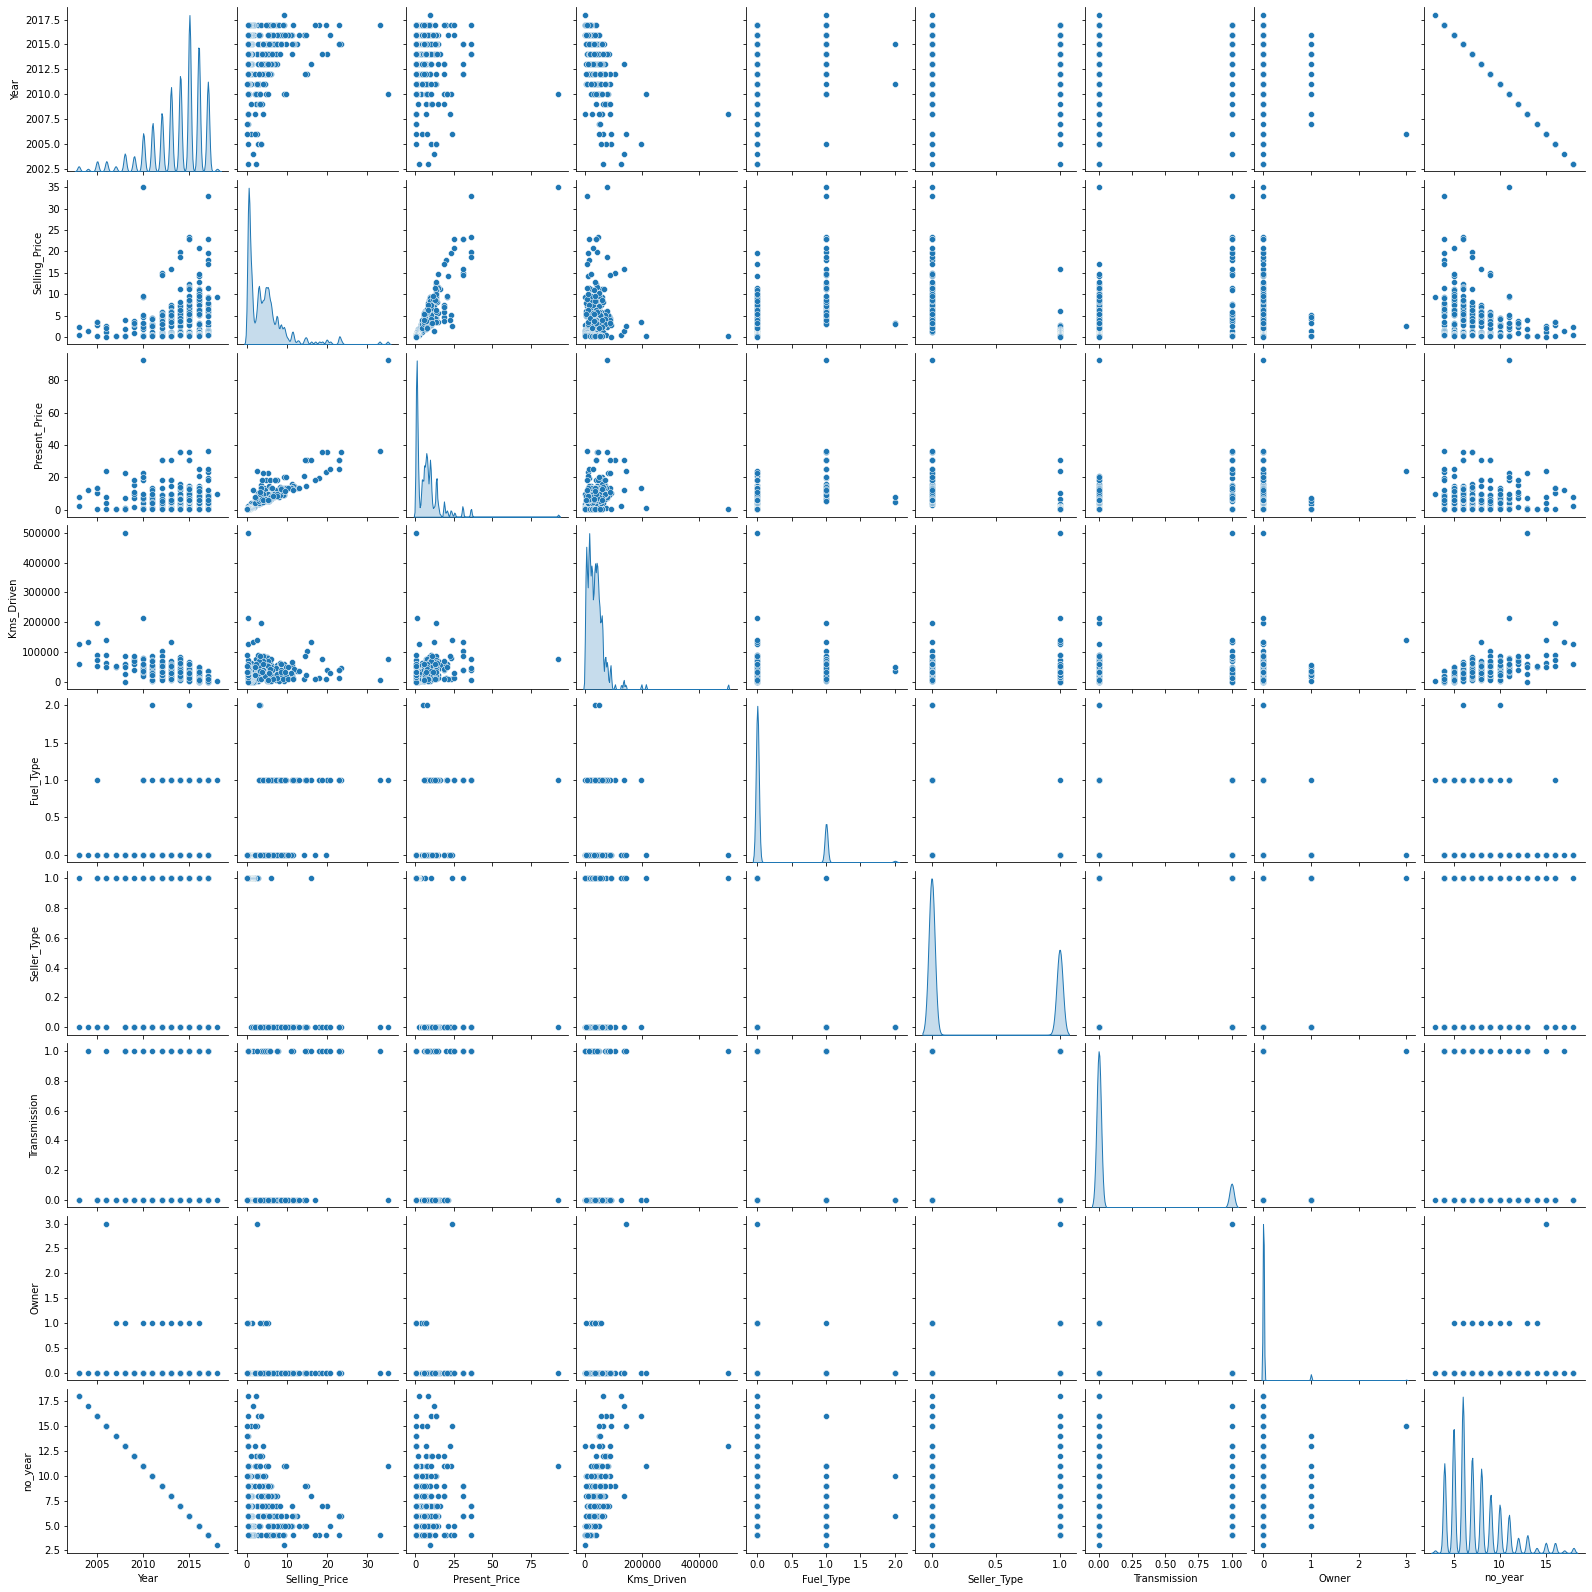

In [18]:
sns.pairplot(data,diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()

In [19]:
data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
Year,1.000000,0.236141,-0.047584,-0.524342,0.053643,-0.039896,-0.000394,-0.182104,-1.000000
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344,-0.236141
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057,0.047584
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216,0.524342
Fuel_Type,0.053643,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705,-0.053643
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269,0.039896
Transmission,-0.000394,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316,0.000394
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000,0.182104
no_year,-1.000000,-0.236141,0.047584,0.524342,-0.053643,0.039896,0.000394,0.182104,1.000000


In [12]:
import seaborn as sns

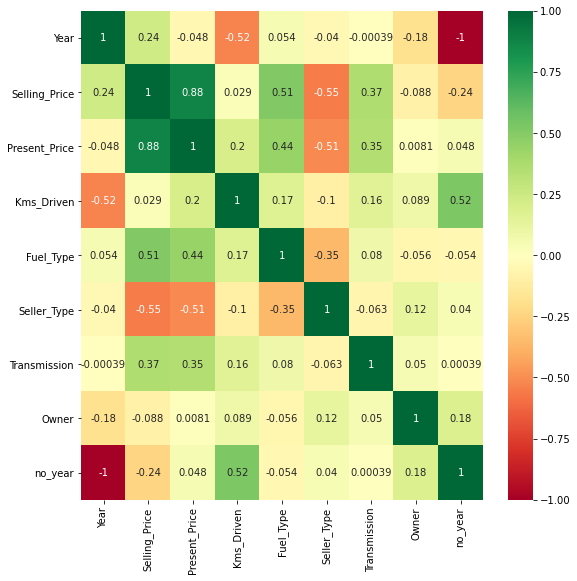

In [20]:
corrmat= data.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(9,9))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<a id="4"></a> 
**Applying Regression Models**

Firstly lets separate Selling price from the data and drop unnecessary features.

In [12]:
y=data.Selling_Price
x=data.drop(["Selling_Price","Car_Name"],axis=1)

Spliting data to train and test sizes.

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 7)
x test:  (61, 7)
y train:  (240,)
y test:  (61,)


Secondly we are going to load libraries that we need calculate scores fo regression models. Than apply function which fit the models, get the scores and plot our predictions .

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

In [31]:
r_2 = [] # List for r 2 score

# Main function for models
def model(algorithm,x_train_,y_train_,x_test_,y_test_): 
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    MAE= mean_absolute_error(y_test_,prediction)
    MSE= mean_squared_error(y_test_,prediction)
    RMSE = math.sqrt(MSE)
    
    # Appending results to Lists 
    r_2.append(R_2)
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("MAE :",MAE,"\n")
    print("MSE :",MSE,"\n")
    print("RMSE :",RMSE,"\n")
    
    # Plot for prediction vs originals
    test_index=y_test_.reset_index()["Selling_Price"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

**1. Linear Regression**

LinearRegression() 

r_2 score : 0.8484549412089455 

MAE : 1.1530045916163707 

MSE : 3.2876460857178422 

RMSE : 1.8131867211398396 



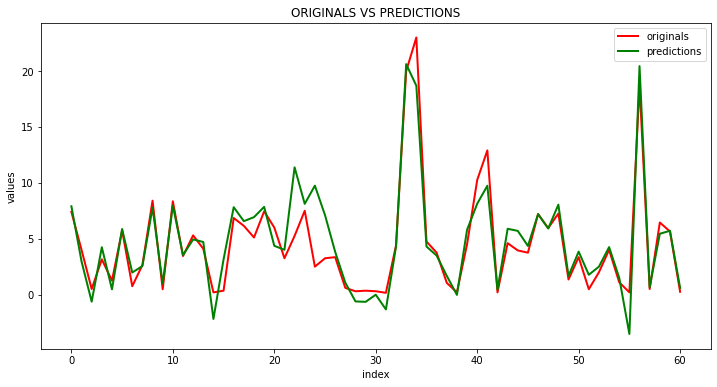

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,x_train,y_train,x_test,y_test)

**2. Decision Tree Regressor**

DecisionTreeRegressor() 

r_2 score : 0.9525227395921378 

MAE : 0.5859016393442623 

MSE : 1.0299803278688522 

RMSE : 1.0148794646995534 



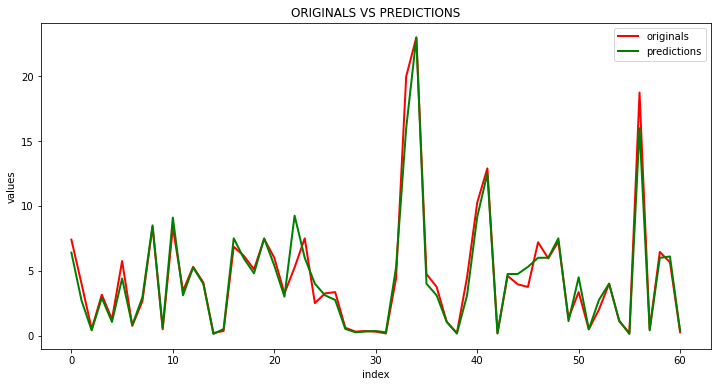

In [33]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model(dtr,x_train,y_train,x_test,y_test)